# Pytanic - ML Solution to predict Survival

Please see below schema of Notebook:
1. Objective
2. Data Understanding
3. Data Preparation
4. Model Building
  * 4a. Explore
  * 4b. Fit
  * 4c. Predict
  * 4d. Score
5. Model Evaluation

> ## Objective
Predict the Survival ability of travellers on the Titanic. We have training and test datasets. `Train` dataset is used apply ML techniques to predict the Survived variable `(0=Did not Survive ; 1=Survived)`  which is further tested on the `test` data to predict model accuracy.
Following question is explored:
1. What are the most important features predicting Surviving?
2. Does age/gender has any relation to surviving?
3. Is there any relationship beteen the class of the passenger and surviving?

---

## 2. Data Understanding
=========================================================================================================================

### Load the Data

In [1]:
# Import all the necessary packages. Packages loaded later in code as well as and when required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Import the DataSets

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Explore the Data

In [3]:
# Checking Distributions

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Separating the Vairable Types

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Show the columns with missing values

display(df_train.isnull().sum()[(df_train.isnull().sum() > 0)]);
display(df_test.isnull().sum()[(df_test.isnull().sum() > 0)])

print("Rows in Train=", df_train.shape[0] , "//  Rows in Test=", df_test.shape[0] , "//  Total rows = ", df_train.shape[0]+df_test.shape[0])

Age         177
Cabin       687
Embarked      2
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64

Rows in Train= 891 //  Rows in Test= 418 //  Total rows =  1309


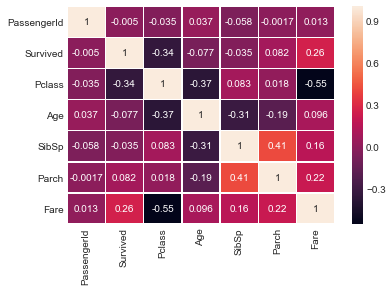

In [6]:
# Check visual correlation plot

#plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5);

> **Below is summary from this correlation plot**
* ***Survived***, has -ve correlation with ***Pclass***
* ***Survived*** is positively correlated to ***Fare***
* ***Fare*** and ***Pclass*** are nevatively correlated, which explains the above points
* ***Pclass*** also has a negative correlation with ***Age*** which says that older people preferred 1st class
* ***Age*** is inversely related to ***Sibling/Spouse*** :: Lower aged has more siblings/spouse
* ***Parent/Children*** also has a direct correlation with ***Siblings/Spouse***. Says that they prefer travelling with family.

### Univariate and Bivariate Explorations

#### Exploring Pclass

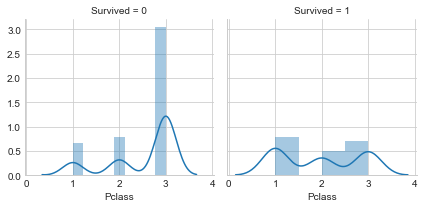

In [8]:
# Survived vs Pclass
import warnings
warnings.filterwarnings("ignore")
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Pclass');

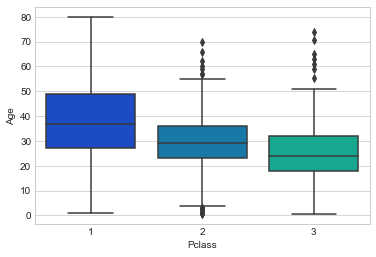

In [10]:
# Pclass vs age
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter');

#### Exploring Age

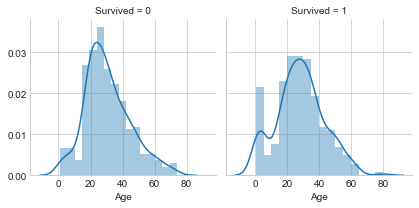

In [11]:
# Survived vs Age
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Age');

#### Exploring Fare

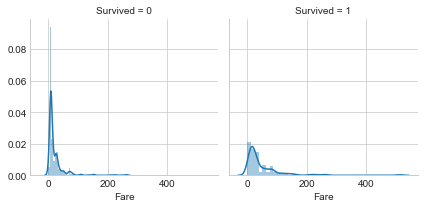

In [12]:
# Survived vs Fare
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Fare');

#### Exploring SibSp

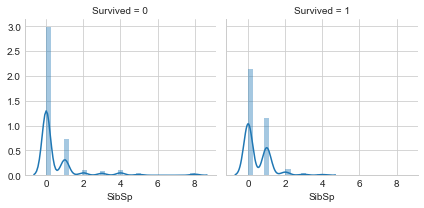

In [13]:
# Survived vs Sibsp
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'SibSp');

### Multivariate Analysis

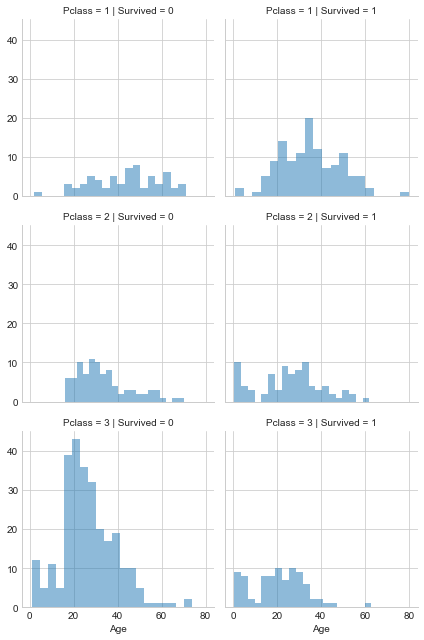

In [15]:
# Survived vs Pclass vs Age

g = sns.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', alpha=.5, bins=20);

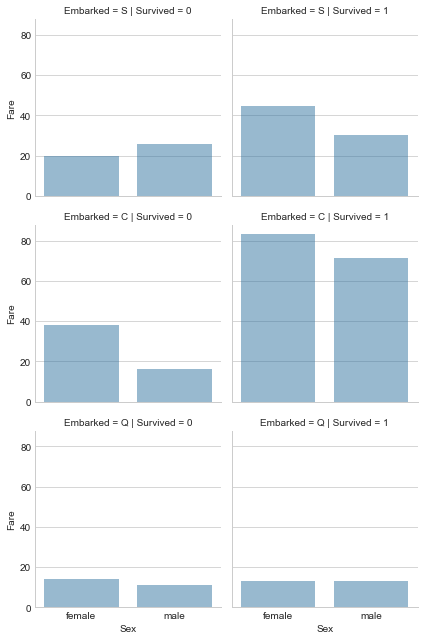

In [18]:
# Survived vs Fare vs Embarked

g = sns.FacetGrid(df_train, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);

> **Key Findings:**

   pclass is major differentiator between survival


----------------------

## 3. Data Preparation
=========================================================================================================================

###  Cleaning Data

In [20]:
# creating copy dataset of train
df_train_clean = df_train.copy()
df_train_clean.shape

(891, 12)

#### Removing Outliers

In [21]:
df_train_clean = df_train_clean[df_train_clean['SibSp'] < 8]
df_train_clean.shape

(884, 12)

In [22]:
df_train_clean = df_train_clean[df_train['Fare'] < 500];
df_train_clean.shape

(881, 12)

### Merging Test and Train (*to impute values in both*)

In [23]:
df = pd.concat([df_train_clean, df_test], ignore_index=True, sort=False)
df.set_index('PassengerId', inplace=True)

print(df.shape)
df.head()

(1299, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.isnull().sum()[(df.isnull().sum() > 0)]

Survived     418
Age          256
Fare           1
Cabin       1006
Embarked       2
dtype: int64

----------------------

## Featurizing and Reshaping
Taking each column at a time and reshaping and or featurizing

#### PassengerID 
is already set as Index
#### Survived
is the Dependent Variable

#### Pclass
set as numeric : no change required

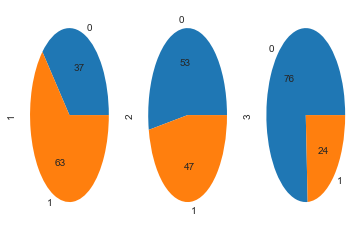

In [25]:
# Pclass
pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind='pie', subplots=True, autopct='%.0f',legend=False);

---

#### Sex

In [25]:
# No need for changes

---

#### Name + Title from Name

In [27]:
# Create Title Column by extracting the Title from Name

df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
print("Missing Values in Title", df.Title.isnull().sum())
pd.crosstab(df['Sex'], df['Title'])

Missing Values in Title 0


Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,256,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,60,0,0,0,752,0,0,8,1,0


In [29]:
# Grouping Titles

title_replace = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Dona': 6,  #Dona is Mrs in Spanish
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

df['Title_Flag'] = df['Title'].apply(lambda x: title_replace.get(x))

In [30]:
# Gathering Name Length and dropping Name

df['NameLen'] = df['Name'].apply(lambda x: len(x))

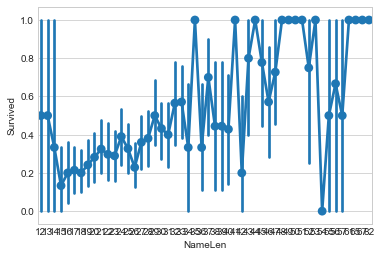

In [31]:
sns.pointplot(x='NameLen',y='Survived', data=df[df.index.isin(df_train.index)]);

---

#### SibSp & Parch :: Familia (Total Family) = Parents + Children + Siblings + Spouse

In [32]:
# Creating total Family Variable

df['Familia'] = df.Parch + df.SibSp

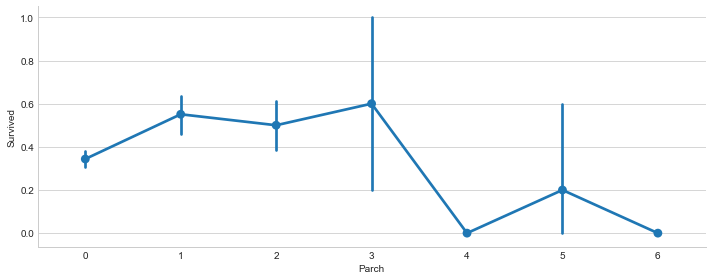

In [33]:
# Parch
sns.factorplot('Parch','Survived', data=df_train, aspect = 2.5);

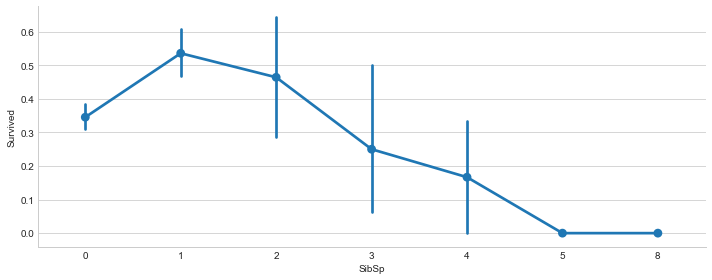

In [34]:
# SibSp
sns.factorplot('SibSp', 'Survived',data=df_train, aspect = 2.5);

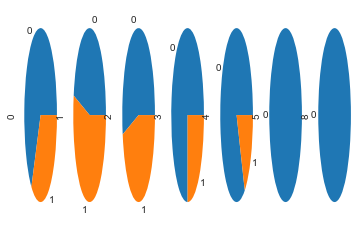

In [35]:
pd.crosstab(df_train['Survived'], df_train['SibSp']).plot(kind='pie', subplots=True, legend=False);

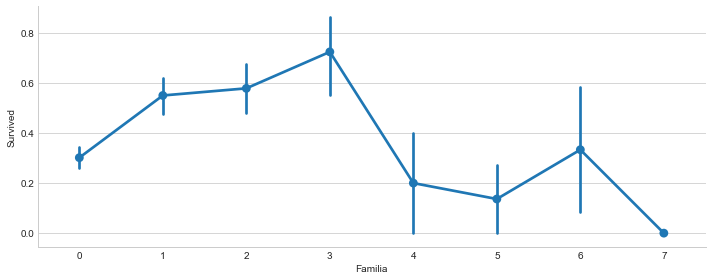

In [36]:
# Check Familia with Survived from Training Set only
sns.factorplot('Familia','Survived', data=df[df.index.isin(df_train.index)], aspect = 2.5);

---

#### Ticket

In [37]:
# breakdown the Ticket and find Strings in them
# df[['Ticketa','Ticketb','Ticketc']] = df.Ticket.str.rsplit(' ', n=2, expand=True)  :: does not work

split_tickets = df['Ticket'].str.rsplit(n=1)
prefixes = [sp[0] if len(sp) == 2 else '' for sp in split_tickets]
df['TicketID'] = prefixes

In [38]:
# There are a few tickets called 'Line'. The fare is 0 for all.
df[df.Ticket == 'LINE']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Flag,NameLen,Familia,TicketID
PassengerId,,,,,,,,,,,,,,,,
180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,19,0,
272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,28,0,
303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,31,0,
598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,19,0,


---

#### Fare

In [39]:
# Fare
df_train.groupby('Survived').Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [40]:
# IMPUTING the missing value

#df[df.Fare.isnull()]

impute_fare = df[(df.Sex=='male') & (df.Familia==0) & (df.Pclass==3) & (df.Title=='Mr') & (df.Embarked=='S')].Fare.mean()
impute_fare

9.654566787003613

In [42]:
df.loc[df.Fare.isnull() , 'Fare'] = impute_fare

In [43]:
# Who pays so much?????
# len(df_train[df_train['Fare'] > 200])  #20 people paid >200 :O
df[df['Fare'] > 200]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Flag,NameLen,Familia,TicketID
PassengerId,,,,,,,,,,,,,,,,
28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,1,30,5,
89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5,26,5,
119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Mr,1,24,1,PC
300,1.0,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Mrs,6,47,1,PC
312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,5,26,4,PC
342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5,30,5,
378,0.0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,Mr,1,25,2,
381,1.0,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,Miss,5,21,0,PC
439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,1,17,5,


---

#### Cabin : Generating Cabin ID

In [44]:
# Creating a CabinID Flag. Filling in missing Cabin as X

df['Cabin'].fillna('X', inplace=True)
df['CabinID'] = df['Cabin'].apply(lambda x: x[0])
df.CabinID.value_counts()

X    1006
C      94
B      63
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinID, dtype: int64

In [45]:
# CabinID vs Fare vs No of Passengers vs Survived (Cabin:Survived = Survival Rate)

df[df.index.isin(df_train.index)].groupby('CabinID').agg({'Fare':'mean', 'Cabin':'size', 'Survived':'sum'}).sort_values('Fare' , ascending=False)

,Fare,Cabin,Survived
CabinID,,,
C,100.151341,59,35.0
B,95.780278,45,33.0
D,57.244576,33,25.0
E,46.026694,32,24.0
A,39.623887,15,7.0
T,35.500000,1,0.0
F,18.696792,13,8.0
X,17.926480,678,205.0
G,13.581250,4,2.0


In [46]:
# Cabin vs Class : Most of the missing Cabins belong to 2nd and 3rd Class.

pd.crosstab(df.CabinID , df.Pclass)

Pclass,1,2,3
CabinID,,,
A,22,0,0
B,63,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
T,1,0,0
X,66,254,686


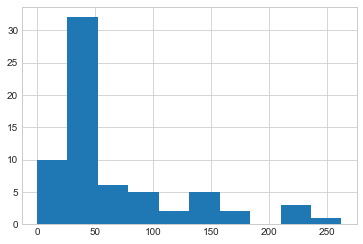

In [47]:
# Taking the 66 Passengers from 1st Class, but missing Cabins and checking the Fares

df[(df['Pclass'] == 1) & (df['CabinID'] == 'X')].Fare.hist();    # Check Distribution of Fares

In [48]:
df.groupby('CabinID').Fare.mean()

CabinID
A     41.244314
B    110.003837
C    107.926598
D     53.007339
E     54.564634
F     18.079367
G     14.205000
T     35.500000
X     18.282214
Name: Fare, dtype: float64

In [49]:
# Attributing the 66 Passengers to their Respective CabinIDs
# Using a simple Decision Tree Classifier to impute the 66 Missing CabinIDs

df_missing_class = df[(df['Pclass'] == 1) & (df['CabinID'] == 'X')][['Fare', 'Familia']]    # Assign to variable
df_missing_class.head(1)


from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
df_missing_class['clus'] = km.fit_predict(  df_missing_class )

pd.concat( [df_missing_class.groupby('clus').Fare.mean() , df_missing_class.groupby('clus').Fare.count()] , axis=1)

,Fare,Fare
clus,,
0,24.832675,32
1,232.190625,4
2,147.966671,7
3,88.414271,7
4,51.097662,16


In [50]:
# Attributing the 66 Passengers to their Respective CabinIDs
# Using a simple Decision Tree Classifier to impute the 66 Missing CabinIDs


df_missing_class = df[(df['Pclass'] == 1) & (df['CabinID'] == 'X')][['Pclass', 'Fare']]    # Assign to variable


# Run Model to Impute CabinID
from sklearn.tree import DecisionTreeClassifier
impute_cabinid = DecisionTreeClassifier()
impute_cabinid.fit (  df.loc[ df['CabinID']!='X' , ['Pclass' , 'Fare'] ] , df.loc[ df['CabinID']!='X' , ['CabinID'] ]  )

# Predict from the Model
PredCabinID = impute_cabinid.predict (df_missing_class)
df_missing_class['PredCabinID'] = PredCabinID


# Check the Predicted CabinIDs and the average Fare
pd.concat( [df_missing_class.groupby('PredCabinID').Fare.mean() , df.groupby('CabinID').Fare.mean()] , axis=1 , sort=False)

,Fare,Fare
A,30.325373,41.244314
B,72.925293,110.003837
C,75.302363,107.926598
D,27.424971,53.007339
E,97.514600,54.564634
F,NaN,18.079367
G,NaN,14.205000
T,NaN,35.500000
X,NaN,18.282214


In [51]:
# Check PC in TicketID and most of them have a CabinID associated with them
pd.crosstab(df.TicketID , df.CabinID).style.apply(lambda x: ['background: lightgreen' if x.name == 'PC' else '' for i in x], axis=1)

CabinID,A,B,C,D,E,F,G,T,X
TicketID,,,,,,,,,
,15,40,71,35,29,18,2,1,750
A. 2.,0,0,0,0,0,0,0,0,1
A./5.,0,0,0,0,0,0,0,0,3
A.5.,0,0,0,0,0,0,0,0,3
A/4,0,0,0,0,0,0,0,0,6
A/4.,0,0,0,0,0,0,0,0,3
A/5,0,0,0,0,0,0,0,0,12
A/5.,0,0,0,0,0,0,0,0,10
A/S,0,0,0,0,0,0,0,0,1


In [52]:
# IMPUTING the 66 Missing CabinIDs with Predicted Features

df.loc[(df['Pclass'] == 1) & (df['CabinID'] == 'X') , 'CabinID'] = PredCabinID
pd.crosstab(df.CabinID , df.Pclass)

Pclass,1,2,3
CabinID,,,
A,33,0,0
B,77,0,0
C,124,0,0
D,47,6,0
E,38,4,3
F,0,13,8
G,0,0,5
T,1,0,0
X,0,254,686


In [53]:
# PC is distributed correctly

pd.crosstab (df[df.TicketID == 'PC'].TicketID , df[df.TicketID == 'PC'].CabinID)

CabinID,A,B,C,D,E
TicketID,,,,,
PC,10,24,30,13,12


In [54]:
# Also checking the No of Cabins booked for families. Count is very less to be of significance

df[df['Cabin'].apply(lambda x: len(x.split(' '))) > 2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Flag,NameLen,Familia,TicketID,CabinID
PassengerId,,,,,,,,,,,,,,,,,
28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,1,30,5,,C
89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5,26,5,,C
312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,5,26,4,PC,B
342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5,30,5,,C
439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,1,17,5,,C
743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,5,37,4,PC,B
873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr,1,24,0,,B
916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,Mrs,6,47,4,PC,B
945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,5,26,5,,C


In [56]:
cabin_replace = {
    'T': 0,
    'X': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'D': 7,
    'E': 8
}

df['Cabin_Flag'] = df['CabinID'].apply(lambda x: cabin_replace.get(x))

---

#### Embarked

In [57]:
df.Embarked.value_counts()

S    907
C    267
Q    123
Name: Embarked, dtype: int64

In [58]:
# Check missing values and IMPUTE with the most common.

df.loc[df.Embarked.isnull() , 'Embarked'] = "S"

---

#### Age

In [60]:
df[df.Age.isnull()].Title.value_counts()

Mr        173
Miss       47
Mrs        27
Master      7
Ms          1
Dr          1
Name: Title, dtype: int64

In [61]:
df.groupby('Title').Age.mean()

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.710957
Mlle            24.000000
Mme             24.000000
Mr              32.240933
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [63]:
df_missing_age = df[df.Age.isnull()][['Familia', 'Fare', 'Pclass' , 'Cabin_Flag' , 'Title_Flag']]  # Assign to Variable

# Create model for Age Imputation
from sklearn.ensemble import RandomForestRegressor
impute_age = RandomForestRegressor(n_estimators=1000)

# Fit an Predict Age
impute_age.fit( df[df.index.isin(df_missing_age.index) == False][['Familia', 'Fare', 'Pclass' , 'Cabin_Flag' , 'Title_Flag']] , 
               df[df.index.isin(df_missing_age.index) == False].Age  )

PredAge = impute_age.predict(df_missing_age)


In [64]:
# IMPUTING the Missing Age with Predicted Features

df.loc[df.Age.isnull() , 'Age'] = PredAge
df.Age.isnull().sum()

0

---

### Standardize and Clean Up Variables

In [65]:
df_final = df.copy()

In [66]:
# Convert Male and Female to 0s and 1s
df_final['Sex'] = df_final.Sex.map({'male':0, 'female':1})

# Convert Embarked
df_final['Embarked'] = df_final.Embarked.map({'S':3, 'C':2, 'Q':1})

In [67]:
# Drop All Categorical Vars
df_final.drop(['Name', 'Ticket', 'Cabin', 'Title', 'TicketID', 'CabinID'], axis=1, inplace=True)
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Flag,NameLen,Familia,Cabin_Flag
PassengerId,,,,,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,3,1,23,1,1
2,1.0,1,1,38.0,1,0,71.2833,2,6,51,1,4
3,1.0,3,1,26.0,0,0,7.9250,3,5,22,0,1
4,1.0,1,1,35.0,1,0,53.1000,3,6,44,1,4
5,0.0,3,0,35.0,0,0,8.0500,3,1,24,0,1


In [68]:
# Drop Additional Vars
# 'SibSp' , 'Parch'  'NameLen',  'Fare'
df_final.drop(['SibSp' , 'Parch', 'Embarked', 'Familia'], axis=1, inplace=True)
df_final.head()

,Survived,Pclass,Sex,Age,Fare,Title_Flag,NameLen,Cabin_Flag
PassengerId,,,,,,,,
1,0.0,3,0,22.0,7.2500,1,23,1
2,1.0,1,1,38.0,71.2833,6,51,4
3,1.0,3,1,26.0,7.9250,5,22,1
4,1.0,1,1,35.0,53.1000,6,44,4
5,0.0,3,0,35.0,8.0500,1,24,1


In [69]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

---

### Breaking into Train/Test

In [70]:
df_train_final = df_final[df_final.Survived.notnull()]
df_test_final = df_final[df_final.Survived.isnull()].drop(['Survived'], axis=1)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df_train_final.drop(['Survived'], axis=1),
                                                     df_train_final['Survived'], 
                                                     test_size=0.2,random_state=42)

In [72]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(704, 7)
(704,)
(177, 7)
(177,)


---

## 4. Model Building
=========================================================================================================================

### Load the Required Libraries

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score


---

In [74]:
def modeler (instance):

    model = instance             # Instantiate
    model.fit(X_train, y_train)  # Fit model

    # Check Metrics
    print('Accuracy Score   :', round(accuracy_score(y_test, model.predict(X_test))*100 , 3)  )
    print('Precision score: :', round(precision_score(y_test, model.predict(X_test))*100 , 3)  )
    print('Recall score     :', round(recall_score(y_test, model.predict(X_test))*100 , 3)  )
    print('\033[1m' + 'F1 score         :', round(f1_score(y_test, model.predict(X_test))*100 , 3)   , '\033[0m')
    
    return

---

### Fit Model and Predict

#### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

modeler (LogisticRegression(solver='lbfgs', max_iter=500))

Accuracy Score   : 83.051
Precision score: : 80.0
Recall score     : 82.051
F1 score         : 81.013 


#### Decision Trees

In [76]:
from sklearn.tree import DecisionTreeClassifier

modeler (DecisionTreeClassifier())

Accuracy Score   : 71.751
Precision score: : 67.5
Recall score     : 69.231
F1 score         : 68.354 


#### Support Vector Machine

In [77]:
from sklearn.svm import SVC

modeler (SVC(gamma='auto'))

Accuracy Score   : 66.102
Precision score: : 84.615
Recall score     : 28.205
F1 score         : 42.308 


#### Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

modeler (GaussianNB())

Accuracy Score   : 83.051
Precision score: : 76.667
Recall score     : 88.462
F1 score         : 82.143 


#### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

modeler (RandomForestClassifier(n_estimators=200))

Accuracy Score   : 83.616
Precision score: : 84.507
Recall score     : 76.923
F1 score         : 80.537 


#### Adaptive Boosting

In [80]:
from sklearn.ensemble import AdaBoostClassifier

modeler (AdaBoostClassifier())

Accuracy Score   : 84.746
Precision score: : 83.117
Recall score     : 82.051
F1 score         : 82.581 


#### Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

modeler (GradientBoostingClassifier())

Accuracy Score   : 85.876
Precision score: : 87.324
Recall score     : 79.487
F1 score         : 83.221 


#### Bagging

In [82]:
from sklearn.ensemble import BaggingClassifier

modeler (BaggingClassifier())

Accuracy Score   : 79.661
Precision score: : 79.167
Recall score     : 73.077
F1 score         : 76.0 


#### Xtreme Gradient Boosting

In [95]:
import warnings

if __name__ == '__main__':
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
from xgboost import XGBClassifier

modeler (XGBClassifier())

Accuracy Score   : 87.571
Precision score: : 88.889
Recall score     : 82.051
F1 score         : 85.333 


---

#### Feature Importance

In [84]:
importance_df = pd.concat(
    (   pd.DataFrame(df_train_final.drop(['Survived'], axis=1).columns, columns = ['variable']), 
        pd.DataFrame(DecisionTreeClassifier().fit(X_train , y_train).feature_importances_, columns = ['DTi']),
        pd.DataFrame(RandomForestClassifier().fit(X_train , y_train).feature_importances_, columns = ['RFi']),
        pd.DataFrame(GradientBoostingClassifier().fit(X_train , y_train).feature_importances_, columns = ['GBi']), 
        pd.DataFrame(AdaBoostClassifier().fit(X_train , y_train).feature_importances_, columns = ['ABi']),
        pd.DataFrame(XGBClassifier().fit(X_train , y_train).feature_importances_, columns = ['XGi'])
                )
                , axis = 1).sort_values(by='XGi', ascending = False)
importance_df

,variable,DTi,RFi,GBi,ABi,XGi
4,Title_Flag,0.312977,0.111305,0.129732,0.08,0.538832
0,Pclass,0.103136,0.053771,0.052128,0.04,0.258946
3,Fare,0.218814,0.221000,0.281986,0.16,0.064014
6,Cabin_Flag,0.016529,0.059213,0.042689,0.06,0.054712
5,NameLen,0.149981,0.201376,0.188315,0.30,0.043531
2,Age,0.189070,0.198530,0.297535,0.36,0.039965
1,Sex,0.009493,0.154805,0.007615,0.00,0.000000


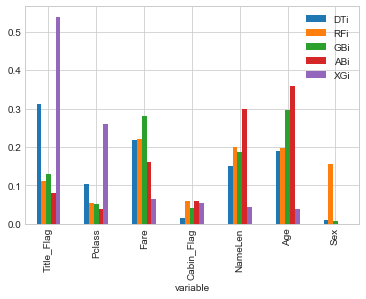

In [85]:
importance_df.plot('variable', kind='bar');

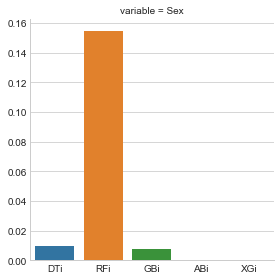

In [86]:
sns.factorplot(col='variable', data = importance_df[importance_df.variable=='Sex'], kind='bar');

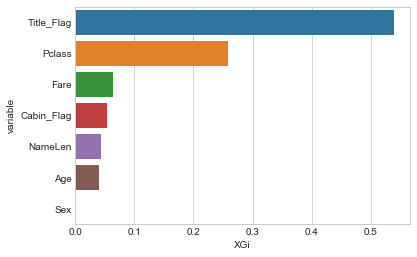

In [87]:
# Individual Importances
sns.barplot(x='XGi', y='variable', data=importance_df);

---

### Final Model Selection and Hyperparameter Tuning using Grid Search

In [88]:
# Define the Best Classifier Chosen from the above options

clf = XGBClassifier()

In [90]:
import warnings

if __name__ == '__main__':
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Define the parameters for Grid Search
parameters = {
        'n_estimators'     : [5,8,10,12,50],
#        'max_depth'        : [3,5,7,9],
#        'min_child_weight' : [1, 5, 10],
#       'gamma'            : [i/10.0 for i in range(0,5)],
#       'subsample'        : [i/10.0 for i in range(6,10)],
#       'colsample_bytree' : [i/10.0 for i in range(6,10)],
        'reg_alpha'        : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
        }


# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8757
F-score on testing data: 0.8743

Optimized Model
------
Final accuracy score on the testing data: 0.8701
Final F-score on the testing data: 0.8702


In [91]:
print("Best CLF =", best_clf)
print("CLF =", clf)

Best CLF = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.05,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
CLF = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


---

### Export the final output

In [92]:
# Predict on the Final Test Dataset (not the Train/Test split data)

# best_clf = GaussianNB().fit(X_train, y_train)  # USE WHEN TEMPORARILY PREDICTING DIRECTLY USING A CLASSIFIER WITHOUT GRID SEARCH

if 'Survived' in df_test_final:
    del df_test_final['Survived']
    df_test_final['Survived'] = best_clf.predict(df_test_final).astype(int)
else:
    df_test_final['Survived'] = best_clf.predict(df_test_final).astype(int)

In [94]:
# Send to File
df_test_final[['Survived']].to_csv('Jupyter.csv')

## Results and Final Thoughts

Using the XGBoost algorithm yields better results, however, simple models can also yield good results subjected to good tuning. This would further depend on the features selected and tuning the hyperparameters.
I have had better models with Logistic Regression as well in initial cases. Feel free to use your own algorithm and explore. Thats the key in building better models: Exploration !
Happy Coding :)